In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [2]:
categories = [
    'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
    'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'
]
trn = []
tst = []
newsgroup_trn = fetch_20newsgroups(subset='train', categories=categories, random_state=42, shuffle=True)
newsgroup_tst = fetch_20newsgroups(subset='test', categories=categories, random_state=42, shuffle=True)

## a)

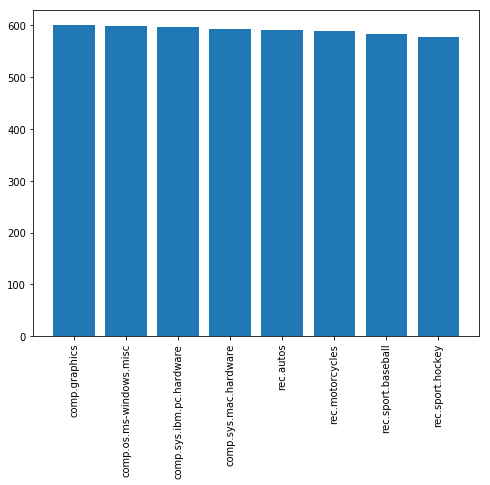

In [3]:
temp = pd.Series(newsgroup_trn.target)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
_ = ax.bar(np.arange(1, 9), temp.value_counts())
labels = ax.set_xticklabels(['0'] + categories, rotation='90')

## b)

In [4]:
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer(r'\w+')

trn = []
tst = []

for i, news in enumerate(newsgroup_trn['data']):
    temp = tokenizer.tokenize(news)
    trn.append(" ".join([stemmer.stem(x) for x in temp]))
    
for i, news in enumerate(newsgroup_tst['data']):
    temp = tokenizer.tokenize(news)
    tst.append(" ".join([stemmer.stem(x) for x in temp]))
    
display(len(trn))
display(len(tst))

4732

3150

In [5]:
vectorizer = TfidfVectorizer(stop_words=list(stop_words.ENGLISH_STOP_WORDS), min_df=2)
trn_tfidf = vectorizer.fit_transform(trn)
tst_tfidf = vectorizer.fit_transform(tst)
display(trn_tfidf.shape)
display(trn_tfidf.shape)

AttributeError: 'list' object has no attribute 'shape'

In [7]:
display(trn_tfidf.shape)
display(trn_tfidf.shape)

(4732, 25434)

(4732, 25434)

## c)

In [9]:
# ???

## d)

In [13]:
svd = TruncatedSVD(50)
lsa = make_pipeline(svd, Normalizer(copy=False))

trn_lsa = lsa.fit_transform(trn_tfidf)
tst_lsa = lsa.fit_transform(tst_tfidf)